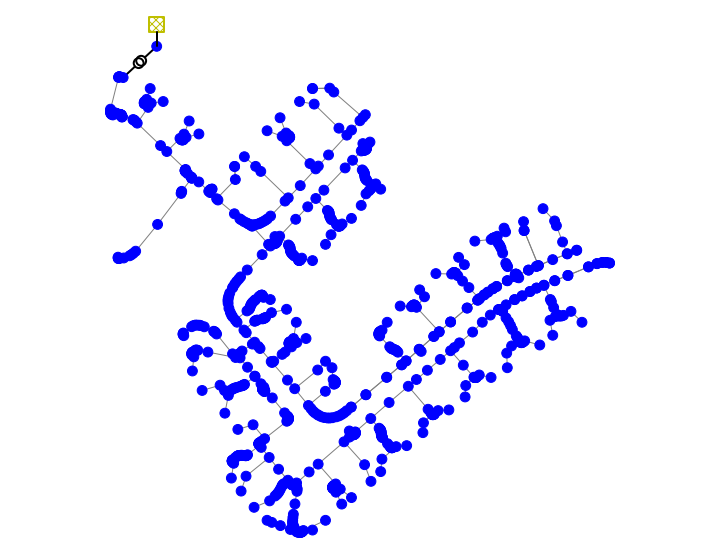

<AxesSubplot:>

In [1]:
import pandapower.plotting as plot
import pandapower.networks as nw
from env_single_phase_13bus import create_13bus
import pandapower as pp
import igraph
# load example net (IEEE 9 buses)
net = pp.networks.ieee_european_lv_asymmetric('on_peak_566')
# simple plot of net with existing geocoordinates or generated artificial geocoordinates
plot.simple_plot(net, show_plot=True)

In [2]:
import matplotlib.pyplot as plt
import os
import pandapower as pp
import pandapower.plotting as plot
import pandapower.networks as nw
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

The number of given colors (1) is smaller than the number of nodes (907) to draw! The colors will be repeated to fit.


<AxesSubplot:>

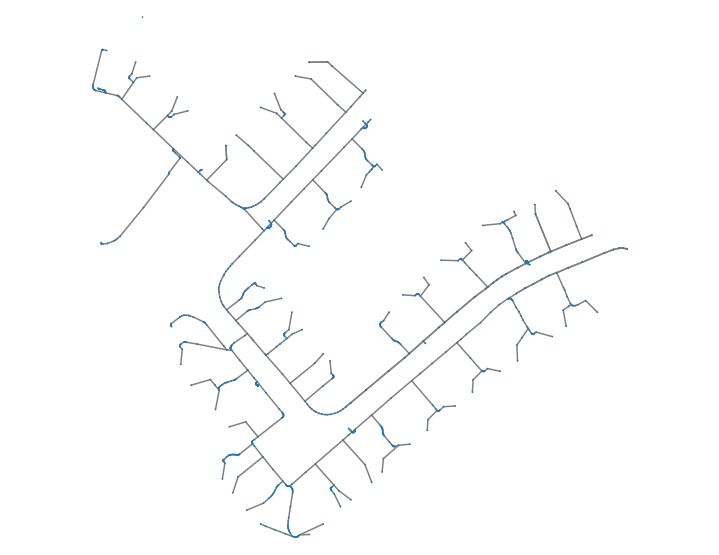

In [3]:
# net = nw.ieee_european_lv_asymmetric()
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=0.1, color=colors[0], zorder=2) #create buses
plot.draw_collections([lc, bc]) # plot lines and buses

The number of given colors (1) is smaller than the number of nodes (3) to draw! The colors will be repeated to fit.


<AxesSubplot:>

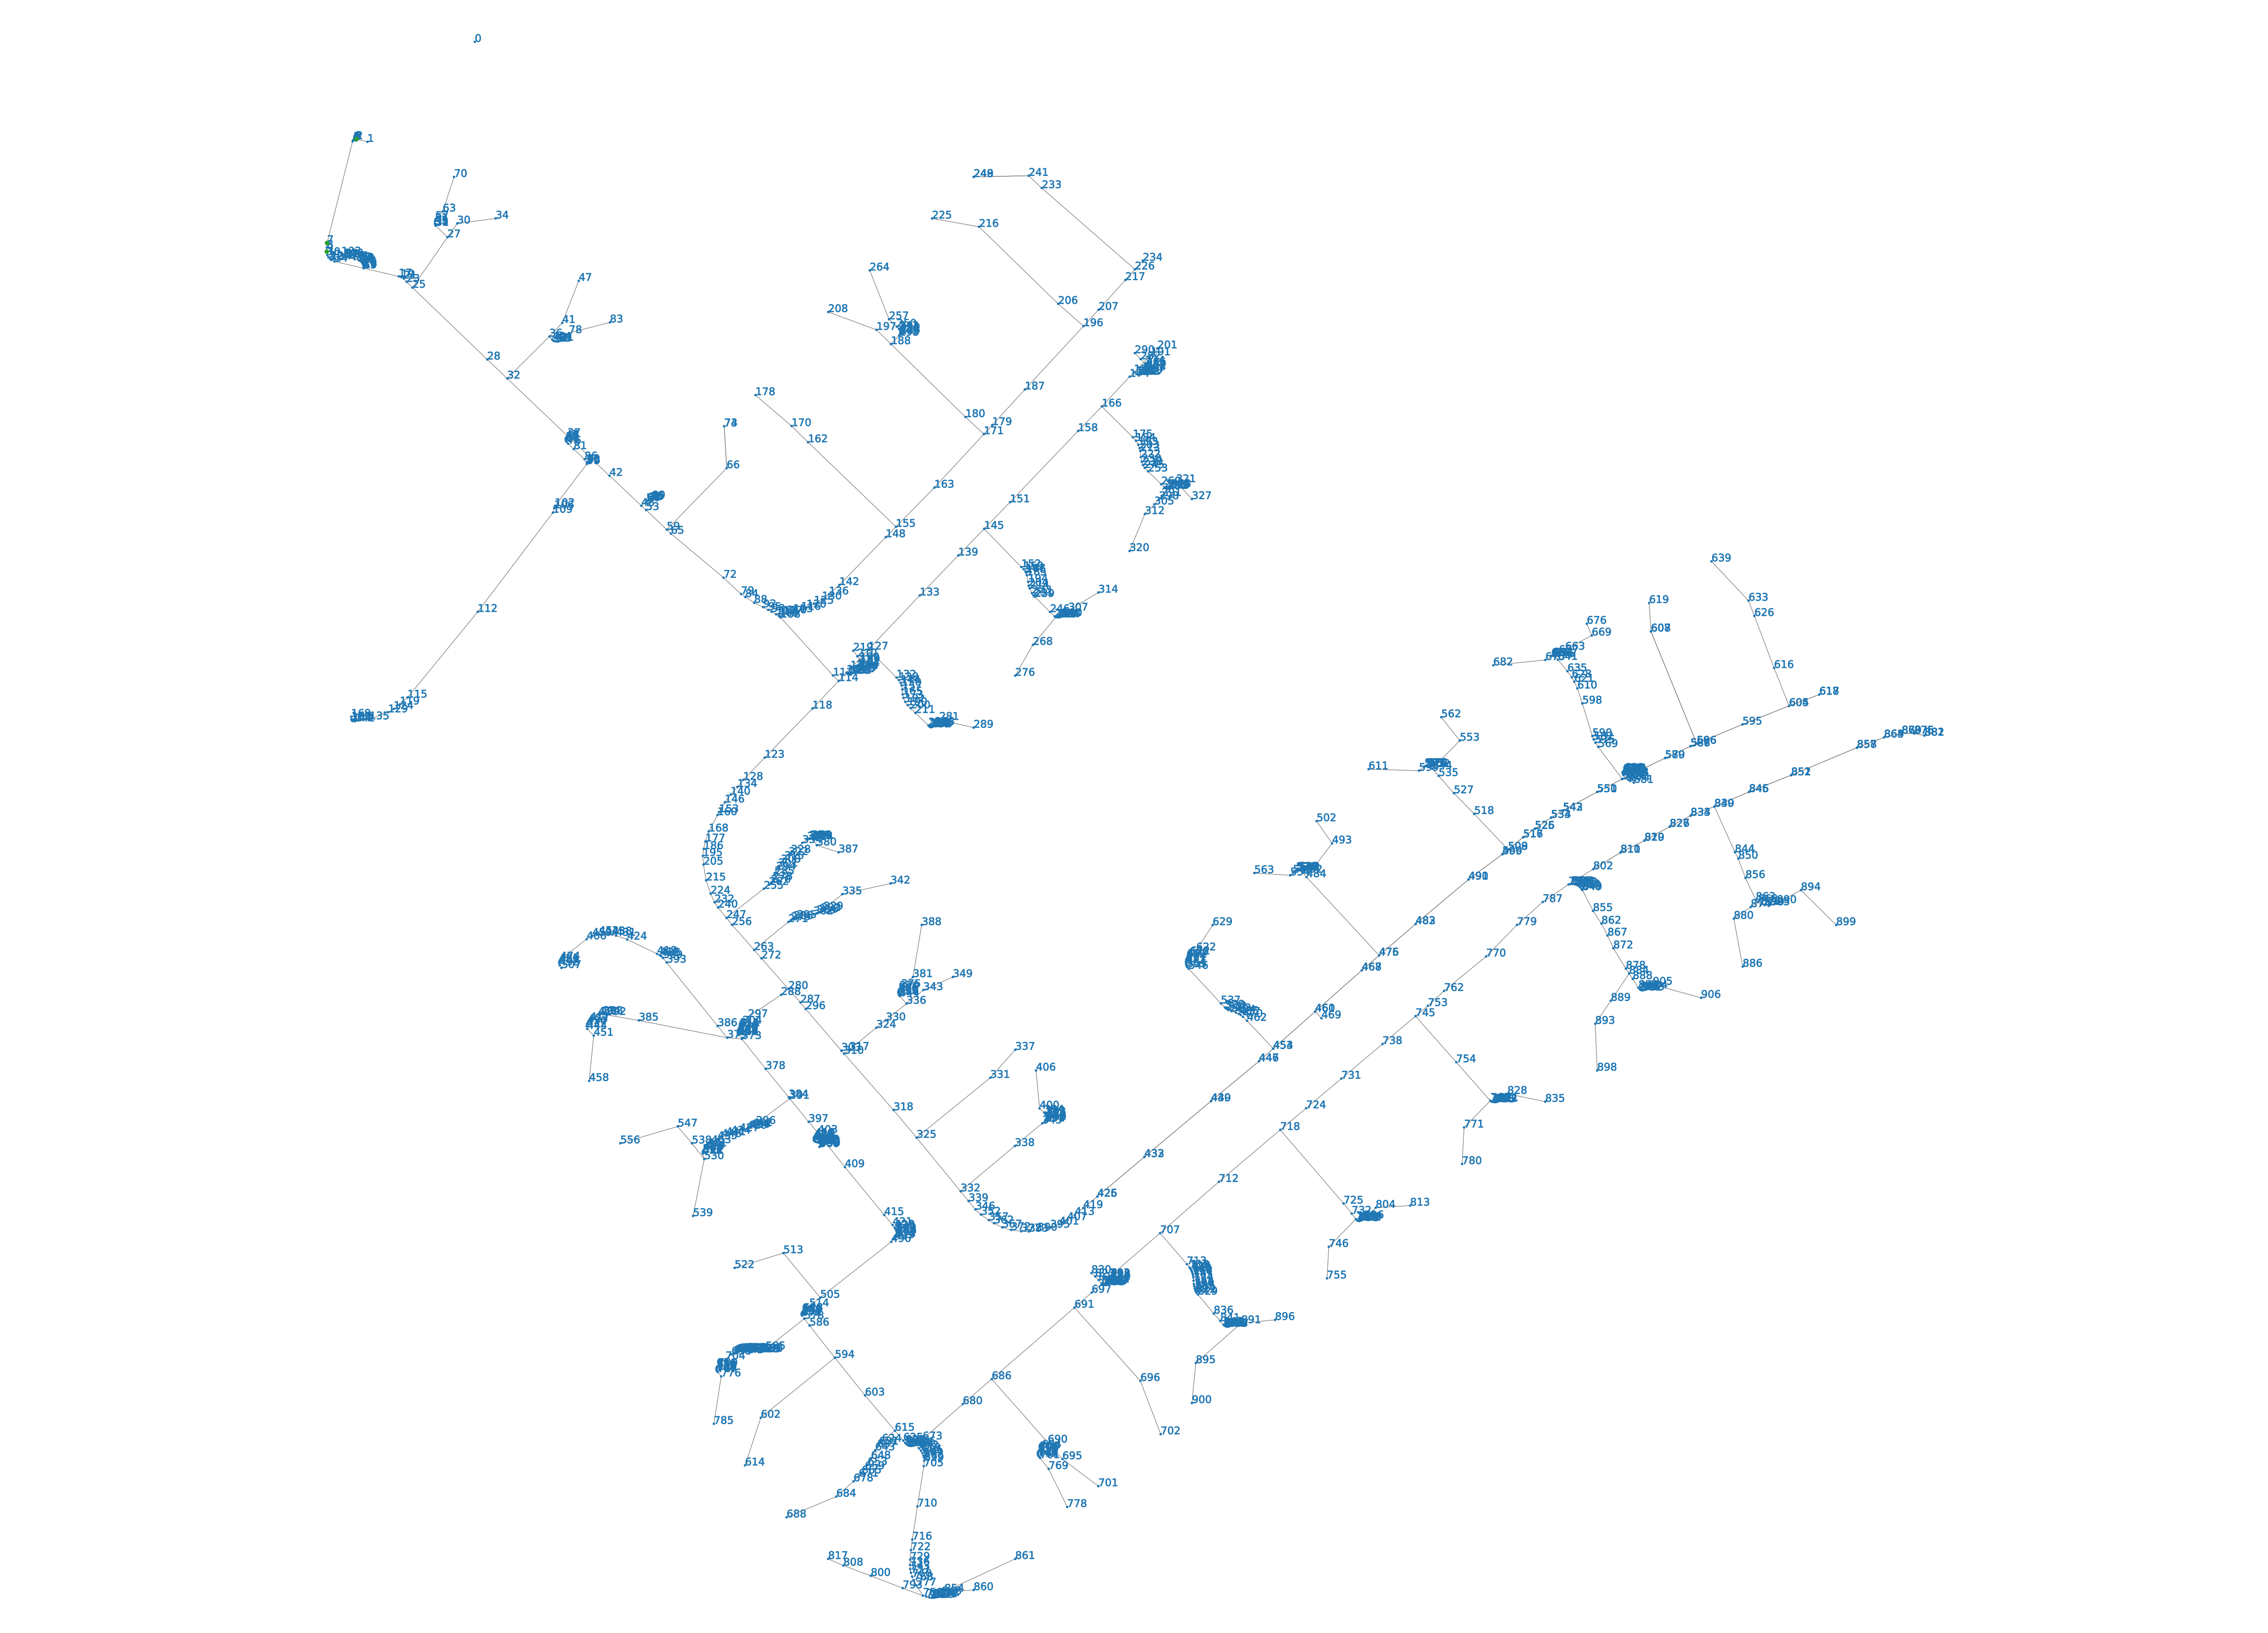

In [4]:
import numpy as np
buses = net.bus.index.tolist() # list of all bus indices
coords = zip(net.bus_geodata.x.loc[buses].values, net.bus_geodata.y.loc[buses].values) # tuples of all bus coords

bic = plot.create_annotation_collection(size=1, texts=np.char.mod('%d', buses), coords=coords, zorder=3, color=colors[0])
bcc = plot.create_bus_collection(net, [2,7,9], size=0.2, color=colors[2], zorder=4) #create buses
plot.draw_collections([lc, bc, bic, bcc], figsize=(80,60)) # plot lines, buses and bus indices

In [5]:
import opendssdirect as dss

In [6]:
from opendssdirect.utils import run_command

In [15]:
run_command('Redirect opendss_model/13bus/IEEE13Nodeckt.dss')

''

In [26]:
dss.utils.loads_to_dataframe()
print(dss.utils.loads_to_dataframe().columns)

Index(['CVRCurve', 'CVRvars', 'CVRwatts', 'CFactor', 'Class', 'Growth',
       'IsDelta', 'Model', 'Name', 'NumCust', 'PF', 'PctMean', 'PctStdDev',
       'RelWeighting', 'Rneut', 'Spectrum', 'Status', 'Vmaxpu', 'VminEmerg',
       'VminNorm', 'Vminpu', 'Xneut', 'Yearly', 'ZipV', 'Daily', 'Duty', 'Idx',
       'kV', 'kW', 'kVABase', 'kvar', 'kWh', 'kWhDays', 'puSeriesRL', 'XfkVA',
       'Phases', 'AllocationFactor'],
      dtype='object')


In [17]:
dss.Bus.Nodes()

[1, 2, 3]

In [18]:
dss.Bus.PuVoltage()

[0.8660658613544954,
 0.4998770263453836,
 -0.0001655068449839027,
 -0.9999937931281331,
 -0.8659003545095113,
 0.500116766977922]

In [22]:
from dssdata import SystemClass

path = "/home/jason/Documents/research/stable-rl-three-phase/opendss_model/13bus/IEEE13Nodeckt.dss"

distSys = SystemClass(path=path, kV=[115, 4.16, 0.48])
print(distSys.name)

ieee13nodeckt


In [23]:
from dssdata.pfmodes import run_static_pf
from dssdata.tools import voltages

[busVoltageDF] = run_static_pf(distSys, tools=[voltages.get_all])
busVoltageDF

,bus_name,v_pu_a,v_pu_b,v_pu_c,ang_a,ang_b,ang_c,phase
0,sourcebus,1.0000,1.0000,1.0000,29.99,-90.01,149.99,abc
1,650,0.9999,1.0000,0.9999,-0.01,-120.01,119.99,abc
2,rg60,1.0560,1.0374,1.0560,-0.01,-120.01,119.98,abc
3,633,1.0113,1.0270,1.0015,-2.59,-121.81,117.76,abc
4,634,0.9872,1.0084,0.9825,-3.28,-122.27,117.27,abc
5,671,0.9828,1.0403,0.9649,-5.37,-122.39,115.99,abc
6,645,NaN,1.0197,1.0023,NaN,-121.94,117.79,bc
7,646,NaN,1.0180,1.0002,NaN,-122.02,117.84,bc
8,692,0.9828,1.0403,0.9649,-5.37,-122.39,115.99,abc
9,675,0.9763,1.0426,0.9630,-5.62,-122.57,116.00,abc


In [24]:
from dssdata.pfmodes import cfg_tspf, run_tspf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import torch

In [4]:
reward_ddpg = torch.load('rewards_ddpg.pt')
reward_sddpg = torch.load('rewards_sddpg.pt')

In [2]:
reward_ddpg = torch.load('rewards_ddpg_q.pt')
reward_sddpg = torch.load('rewards_sddpg_q.pt')
reward_ddpg = reward_ddpg.numpy()
reward_sddpg = reward_sddpg.numpy()
reward_ddpg1 = torch.load('rewards_ddpg_q1.pt')
reward_sddpg1 = torch.load('rewards_sddpg_q1.pt')
reward_ddpg1 = reward_ddpg1.numpy()
reward_sddpg1 = reward_sddpg1.numpy()
reward_ddpg2 = torch.load('rewards_ddpg_q2.pt')
reward_sddpg2 = torch.load('rewards_sddpg_q2.pt')
reward_ddpg2 = reward_ddpg2.numpy()
reward_sddpg2 = reward_sddpg2.numpy()

In [2]:
# reward_ddpg2 = torch.load('rewards_ddpg2.pt')
reward_sddpg13 = torch.load('rewards_ddpg_q.pt')
# reward_ddpg2 = reward_ddpg2.numpy()
reward_sddpg13 = reward_sddpg13.numpy()

In [3]:
def mean_list(loss_list,loss_list1,loss_list2, stride=40):
    mean_values=[]
    std_values=[]
    loss_list = np.array(loss_list)
    loss_list1 = np.array(loss_list1)
    loss_list2 = np.array(loss_list2)
    for i in range(len(loss_list)):
        tmp = [loss_list[i],loss_list1[i],loss_list2[i]] #,loss_list1[i],loss_list2[i]
        if i ==0:
            temp_list = [loss_list[i]]
        else:
            temp_list = (loss_list[max((i-stride),0):i]+loss_list1[max((i-stride),0):i]+loss_list2[max((i-stride),0):i])/3
        mean_values.append(np.mean(temp_list))
        std_values.append(np.std(tmp))
    return mean_values,std_values

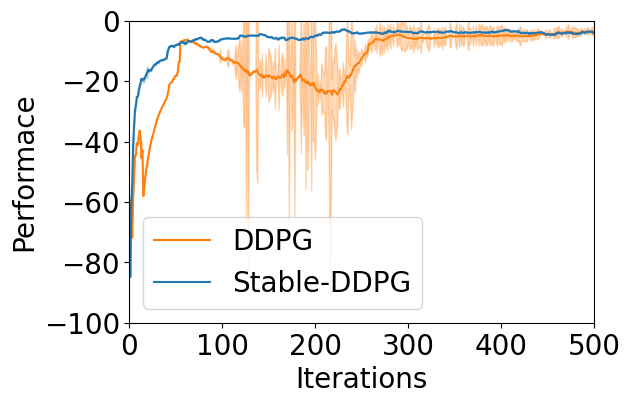

In [6]:
reward_ddpg = reward_ddpg[:500]
reward_ddpg1 = reward_ddpg1[:500]
reward_ddpg2 = reward_ddpg2[:500]
reward_sddpg = reward_ddpg[:500]
reward_sddpg1 = reward_sddpg1[:500]
reward_sddpg2 = reward_sddpg2[:500]

font_size = 20
config = {"font.size":font_size}
rcParams.update(config)
fig, ax1 = plt.subplots(figsize=(6,4),dpi=100)
mean_values, std_values = mean_list(reward_ddpg,reward_ddpg1,reward_ddpg2)
# print(mean_values[0])
std_down = [mean_values[i]-std_values[i] for i in range(len(mean_values))]
std_up = [mean_values[i]+std_values[i] for i in range(len(mean_values))]
ax1.plot(range(len(mean_values)),mean_values,color='C1',label='DDPG')
ax1.fill_between(range(len(mean_values)),std_down,std_up,color='C1',alpha=0.3)
mean_values, std_values = mean_list(reward_sddpg1,reward_sddpg1,reward_sddpg2)
std_down = [mean_values[i]-std_values[i] for i in range(len(mean_values))]
std_up = [mean_values[i]+std_values[i] for i in range(len(mean_values))]
ax1.plot(range(len(mean_values)),mean_values,color='C0',label='Stable-DDPG')
ax1.fill_between(range(len(mean_values)),std_down,std_up,color='C0',alpha=0.3)
plt.ylim([-100,0])
plt.xlim([0,500])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Performace')
# plt.gcf().subplots_adjust(left=0.18)
plt.legend()

In [47]:
print(reward_ddpg[:40])

[-4.87962327e+01 -6.22473512e+00 -4.91412207e+01 -5.15029377e+01
 -6.02252138e+01 -4.08629252e+00 -6.18644631e+01 -2.79820232e+00
 -7.57191415e+00 -5.76635270e+01 -7.86489445e-01 -1.86374539e+00
 -7.54037032e-01 -5.22307909e+01 -2.92769662e+00 -5.99172538e+01
 -1.33304919e+00 -8.46859815e-01 -5.60738867e+01 -8.80813056e-01
 -2.00161907e+01 -1.97761475e+00 -3.02946673e+01 -1.65599851e+01
  0.00000000e+00 -1.26860668e+00 -3.39433965e+02 -1.23001585e+03
 -5.62834955e+02 -1.08033233e+02 -1.68948376e+01 -2.96547753e+01
 -2.45514296e+00 -2.32332550e+01 -7.52058750e+00 -4.40477988e+00
 -9.42463309e+00 -9.24263469e-01 -4.32541603e+00 -2.62246272e+00]


In [68]:
from scipy.io import loadmat
p_ag=loadmat('aggr_p.mat')
print(p_ag['p'].shape)

(14421, 1)


In [67]:
p_ag=loadmat('PV.mat')
print(p_ag['actual_PV_profile'][0,5000])

2.855665792816977
